# MPATE-GE 2623 - Music Information Retrieval
## Final Project


## Sound Classification for Instrument Recognition
---

In this final project, we will built on top of our HW1 Sound Classification for Instrument Recognition using MFCCs as the feature and explore a different approach using latent space as the feature.

Starting from an available dataset of samples from different instruments, we will extract timbre-related features from the audio. Once processed, the data will be segmented into training, validation, and testing sets to ensure the model's robustness and generalization capabilities.

Using a simple model, we will analyze and critic its performance, trying to explain its behaviour to be able to improve it in the future.

In [1]:
# This two lines of code make your notebook aware of changes in
# your utils.py file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [2]:
# We will use mirdata to load and handle the data
# See https://mirdata.readthedocs.io/en/stable/source/overview.html
#!pip install mirdata # install mirdata

In [3]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py
import utils as u # to use the functions from utils, do u.function()
import utils_latent as u_l

c:\ProgramData\anaconda3\envs\torch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ProgramData\anaconda3\envs\torch-gpu\lib\site-packages\music2latent\inference.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add

In [4]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)

## Part 1 - Load the data and split it





For this assignment we will use a subset of the Medley-Solos-DB dataset:

<blockquote>
V. Lostanlen, C.E. Cella. Deep convolutional networks on the pitch spiral for musical instrument recognition. Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), 2016.
</blockquote>

This dataset is accessible to you for this homework in
[Google Drive](https://drive.google.com/file/d/1D8ji0ntQ2P72znec_7y9qdyNhXUtAslM/view?usp=sharing). To use it with this Colab notebook, you should download it and upload a copy on your Google Drive. You should create a `mir_datasets` folder and put the dataset there so it is accesible at `/content/drive/MyDrive/mir_datasets/medley_solos_db`.

### Part 1-A: Load the data using mirdata

In [5]:
# This snippet mounts your Drive so you can work with the dataset in it
#from google.colab import drive
#drive.mount('/content/drive/')

In [6]:
import mirdata

In [9]:
data_home = "C:\Dataset\medley_solos_db"
medley_large = mirdata.initialize('medley_solos_db')
#medley_large.download() 
#medley_large.validate()
dataset = u.load_data(data_home)
len(dataset.load_tracks())

21571

In [10]:
# using the complete large dataset instead of mini version, no longer need this cell
# import pandas as pd 
# metadata = pd.read_csv(data_home+'\\annotation\\Medley-solos-DB_metadata.csv')
# metadata_track_ids = metadata['uuid4'].values
# dataset.track_ids = metadata_track_ids
# print(len(dataset.load_tracks()))

In [11]:
# Check that the data loads correctly by loading a file
dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca').audio

(array([0.05877647, 0.07739695, 0.06003391, ..., 0.00279894, 0.00765386,
        0.01483029], dtype=float32),
 22050)

### Part 1-B: Divide the dataset into train, test, and validation splits




In [12]:
# run this to create the track lists
#print(dataset.load_tracks())
#print(dataset.load_tracks())
#print(dataset.track(1695065d-be3f-565b-f18b-28b394509e0c))
#for key, track in dataset.load_tracks().items():
#   print(key, track.subset)
    
tracks_train, tracks_validate, tracks_test = u.split_data(dataset.load_tracks())

print("There are {} tracks in the training set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

There are 5841 tracks in the training set
There are 3494 tracks in the validation set
There are 12236 tracks in the test set


## Part 2: Extract Features


### Part 2-A: Compute the MFCCs of a track


In [13]:
track = dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca')
y_test, fs_test = track.audio

mfcc = u.compute_mfccs(y_test, fs_test)
print("{} time frames, {} mfcc coefficients".format(mfcc.shape[0], mfcc.shape[1]))


129 time frames, 19 mfcc coefficients


### Part 2-A: Compute the latent space of a track, using music2latent

In [14]:
# uncomment to install music2latent， see repo: https://github.com/SonyCSLParis/music2latent
# !pip install music2latent

In [15]:
#testing for encoding and decoding function for audio
from music2latent import EncoderDecoder

encdec = EncoderDecoder()


latent = encdec.encode(y_test)
wv_rec = encdec.decode(latent)

import IPython
print('Original')
IPython.display.display(IPython.display.Audio(y_test, rate=fs_test))
print('Reconstructed')
IPython.display.display(IPython.display.Audio(wv_rec.squeeze().cpu().numpy(), rate=fs_test))


c:\ProgramData\anaconda3\envs\torch-gpu\lib\site-packages\music2latent\inference.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(self.load_path_

Original


Reconstructed


In [16]:
print(fs_test)

22050


In [17]:
# extract latent space feature for downstrem tasks or for our classification task, 64 channels are a highly-compressed form
features = encdec.encode(y_test)
# alternatively, can use extract_features = true, which will return a tensor with much higher number of channels
# features = encdec.encode(y_test, extract_features=True)
# "torch.Size([1, 8192, 15])


In [18]:
# print(features)
# print(features.shape)
print(features.size())

torch.Size([1, 64, 15])


### Part 2-B: Compute summary statistics




In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

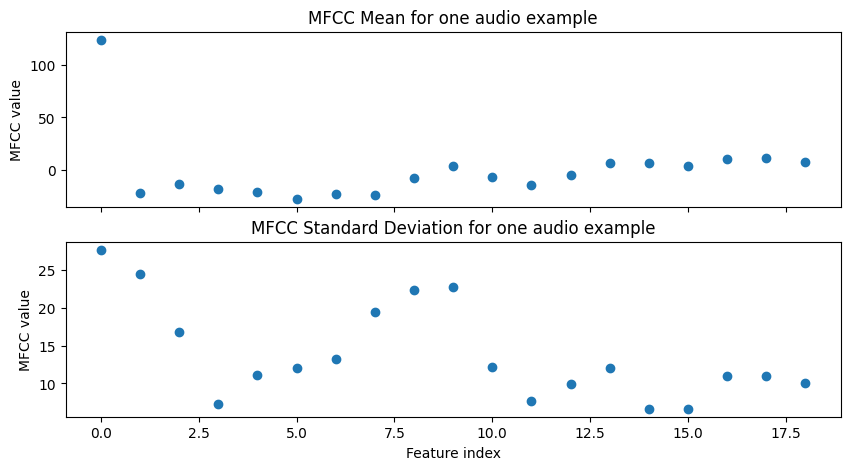

In [20]:
# test your function by running this code
mean, std = u.get_stats(mfcc)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax1.plot(np.arange(len(mean)), mean, 'o')
ax1.set_title("MFCC Mean for one audio example")
ax1.set_ylabel("MFCC value")
ax2.plot(np.arange(len(std)), std, 'o')
ax2.set_title("MFCC Standard Deviation for one audio example")
ax2.set_xlabel("Feature index")
ax2.set_ylabel("MFCC value")

plt.show()

## Part 3: Prepare the Data


### Part 3-A: Compute features for all data and reshape





In [21]:
# run this to obtain features and labels for each data split
# this can take some time.
X_raw_train, Y_train = u.get_features_and_labels(tracks_train)
X_raw_validate, Y_validate = u.get_features_and_labels(tracks_validate)
X_raw_test, Y_test = u.get_features_and_labels(tracks_test)

# save features so you don't have to run this again
np.save('X_raw_train.npy', X_raw_train)
np.save('X_raw_validate.npy', X_raw_validate)
np.save('X_raw_test.npy', X_raw_test)

np.save('Y_train.npy', Y_train)
np.save('Y_validate.npy', Y_validate)
np.save('Y_test.npy', Y_test)

In [22]:
X_latent_train, Y_latent_train = u_l.get_features_and_labels_latent(tracks_train)
X_latent_validate, Y_latent_validate = u_l.get_features_and_labels_latent(tracks_validate)
X_latent_test, Y_latent_test = u_l.get_features_and_labels_latent(tracks_test)

np.save('X_latent_train.npy', X_latent_train)
np.save('X_latent_validate.npy', X_latent_validate)
np.save('X_latent_test.npy', X_latent_test)

np.save('Y_latent_train.npy', Y_latent_train)
np.save('Y_latent_validate.npy', Y_latent_validate)
np.save('Y_latent_test.npy', Y_latent_test)


### Part 3-B: Normalize the Data



In [23]:
# We normalize all features with the stats of the training data for assessing generalization

# Load here the data if you saved the features!
# ....

mu, sigma = u.get_stats(X_raw_train)

X_train = u.normalize(X_raw_train, mu, sigma)
X_validate = u.normalize(X_raw_validate, mu, sigma)
X_test = u.normalize(X_raw_test, mu, sigma)

In [24]:
mu, sigma = u.get_stats(X_latent_train)
X_latent_train = u.normalize(X_latent_train, mu, sigma)
X_latent_validate = u.normalize(X_latent_validate, mu, sigma)
X_latent_test = u.normalize(X_latent_test, mu, sigma)

In [25]:
# print(X_raw_train)
# print(X_raw_train.shape)
# print(X_latent_train)
# print(X_latent_train.shape)

## Part 4: Training and validation

c:\ProgramData\anaconda3\envs\torch-gpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\envs\torch-gpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\envs\torch-gpu\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\envs\torch-gpu\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\envs\torch-gpu\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


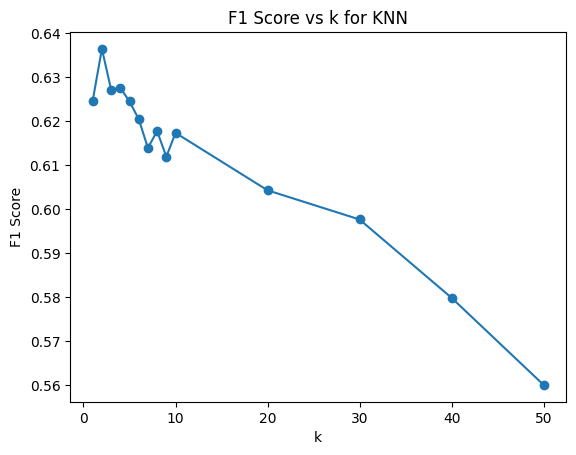

2


In [26]:
# run this to train the models
knn_clf, best_k = u.fit_knn(X_raw_train, Y_train, X_raw_validate, Y_validate)
print(best_k)

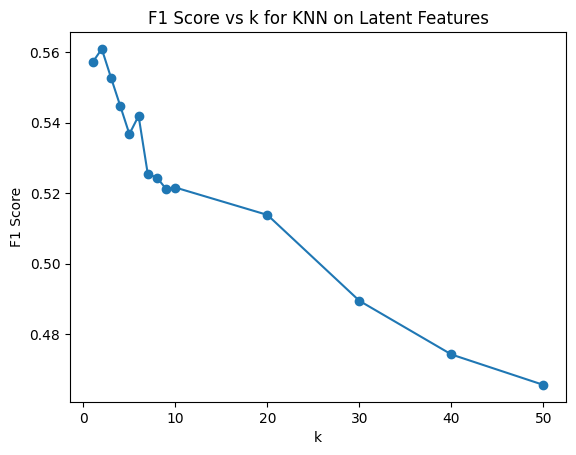

Best k: 2


In [27]:
knn_clf_latent, best_k_latent = u_l.fit_knn_latent(X_latent_train, Y_latent_train, X_latent_validate, Y_latent_validate)
print("Best k:", best_k_latent)

## Part 5: Analysis

In [28]:
from sklearn.metrics import f1_score

### Part 5-A: Compute predictions and evaluate


1. Predict the labels for the test set.
2. Compute & print the average f1_score (or f_measure) in the dataset.

Hint: Look at the documentation of Sklearn on how to do the predictions, evaluation, etc.

In [29]:
# YOUR CODE HERE
print(X_raw_test)
print(X_raw_test.shape)
y_pred = knn_clf.predict(X_raw_test)

# Step 2: Compute the average F1 score
f1 = f1_score(Y_test, y_pred, average='macro')

# Print the F1 score
print("average score " + str(f1))


[[ 77.57958   -17.409908    9.674509  ...  28.664791   16.39905
    8.2125435]
 [107.1719    -20.547318    9.390675  ...  19.323845   14.794962
   10.395372 ]
 [100.51228   -35.80307     7.1704926 ...  23.492605   14.334282
    9.755608 ]
 ...
 [ 98.22407   -29.398458   16.75877   ...   5.855262    6.5844193
    6.4875026]
 [ 71.37801     9.700232   18.12387   ...   4.8570223   6.645226
    7.6190834]
 [111.51411    28.805584   30.934532  ...   6.128009    9.238801
    9.600656 ]]
(12236, 38)
average score 0.5634211014059952


In [30]:
# YOUR CODE HERE
print(X_latent_test)
print(X_latent_test.shape)
y_latent_pred = knn_clf_latent.predict(X_latent_test)

# Step 2: Compute the average F1 score
f1 = f1_score(Y_latent_test, y_latent_pred, average='macro')

# Print the F1 score
print("average score " + str(f1))


[[-0.3154  1.155  -0.563  ...  1.746   1.047   1.055 ]
 [-0.1815  1.499  -1.362  ...  0.922   1.118   1.902 ]
 [ 0.9478  1.543  -0.795  ...  0.5376  0.3848  2.133 ]
 ...
 [-2.225  -0.3713  0.7627 ... -0.0863  0.403  -0.1624]
 [-2.582  -0.932   0.9766 ...  0.5586  1.893  -0.916 ]
 [-1.956  -1.353  -0.605  ... -1.221  -0.4104 -0.9966]]
(12236, 128)
average score 0.47881410146479714


`# YOUR RESPONSE HERE`

### Part 5-B: Compute a confusion matrix
1. Compute the confusion matrix (use `sklearn.metrics.confusion_matrix`)
2. Plot the confusion matrix (see the example [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)).


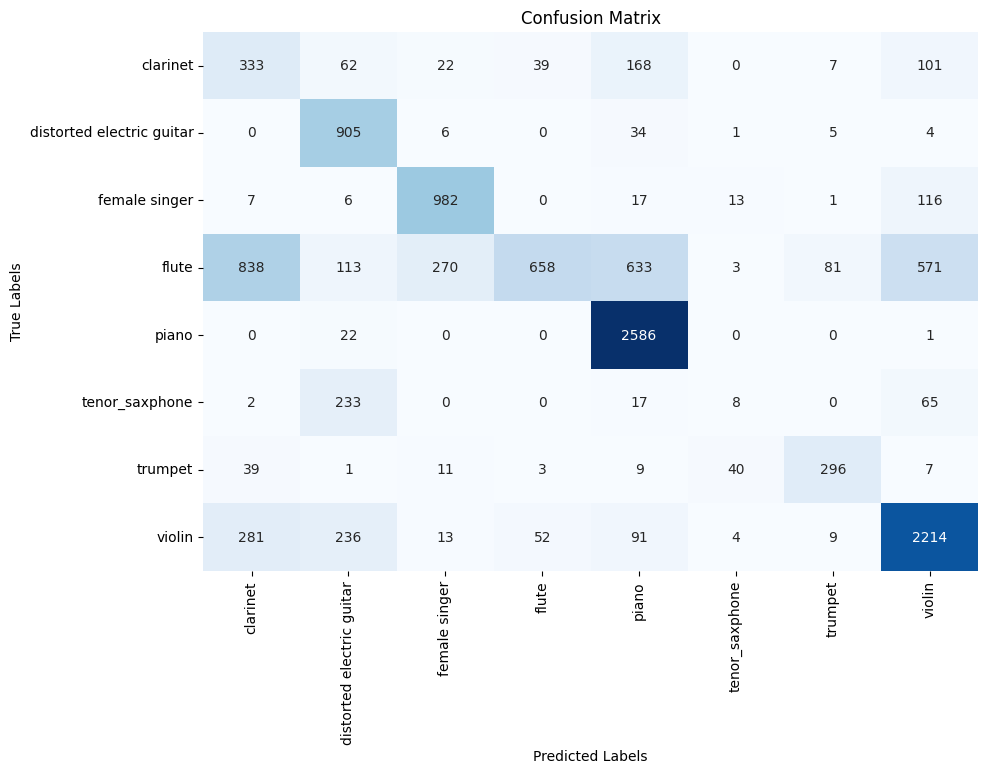

In [31]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

matrix = confusion_matrix(Y_test, y_pred)

# for print out classes instead of 0-7 labels
class_names = ['clarinet', 'distorted electric guitar', 'female singer', 'flute', 'piano', 'tenor_saxphone', 'trumpet', 'violin'] 

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,  xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

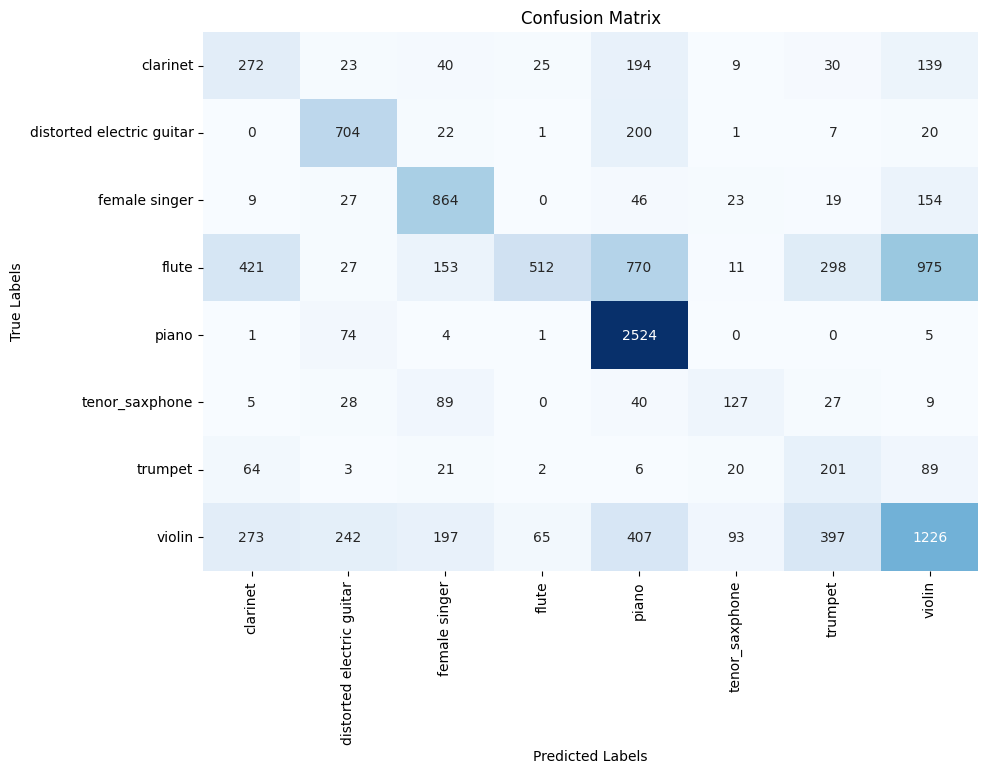

In [32]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

matrix = confusion_matrix(Y_latent_test, y_latent_pred)

# for print out classes instead of 0-7 labels
class_names = ['clarinet', 'distorted electric guitar', 'female singer', 'flute', 'piano', 'tenor_saxphone', 'trumpet', 'violin'] 

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,  xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

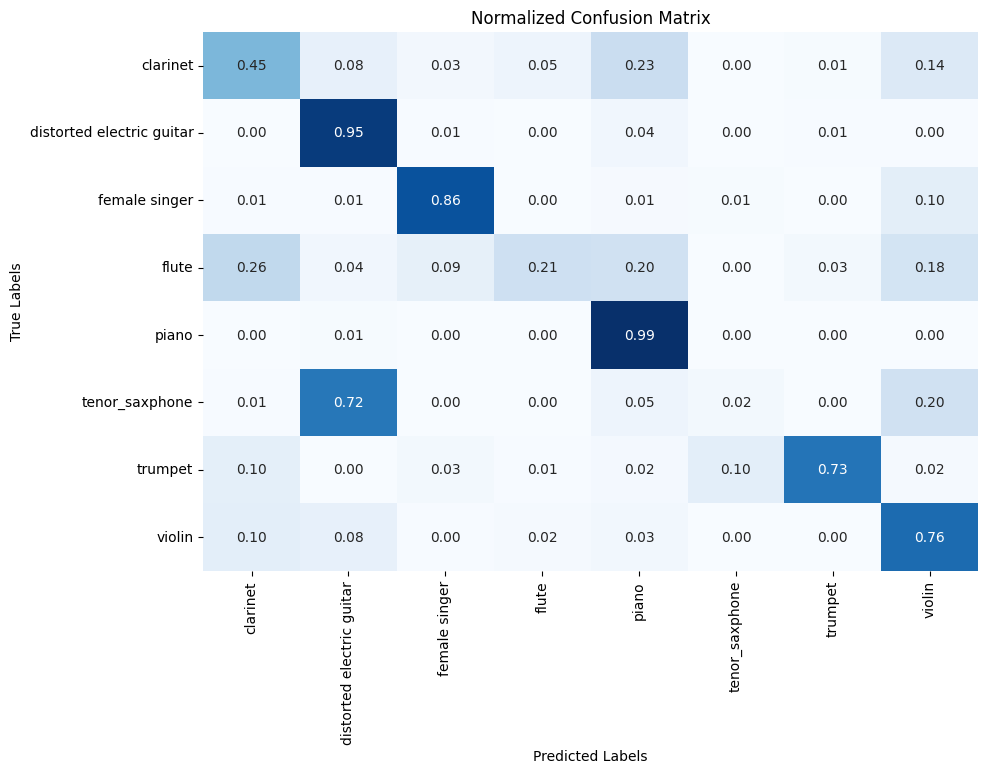

In [33]:
# for printing a normalized matrix
matrix_norm = confusion_matrix(Y_test, y_pred, normalize='true' )

plt.figure(figsize=(10, 7))
sns.heatmap(matrix_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

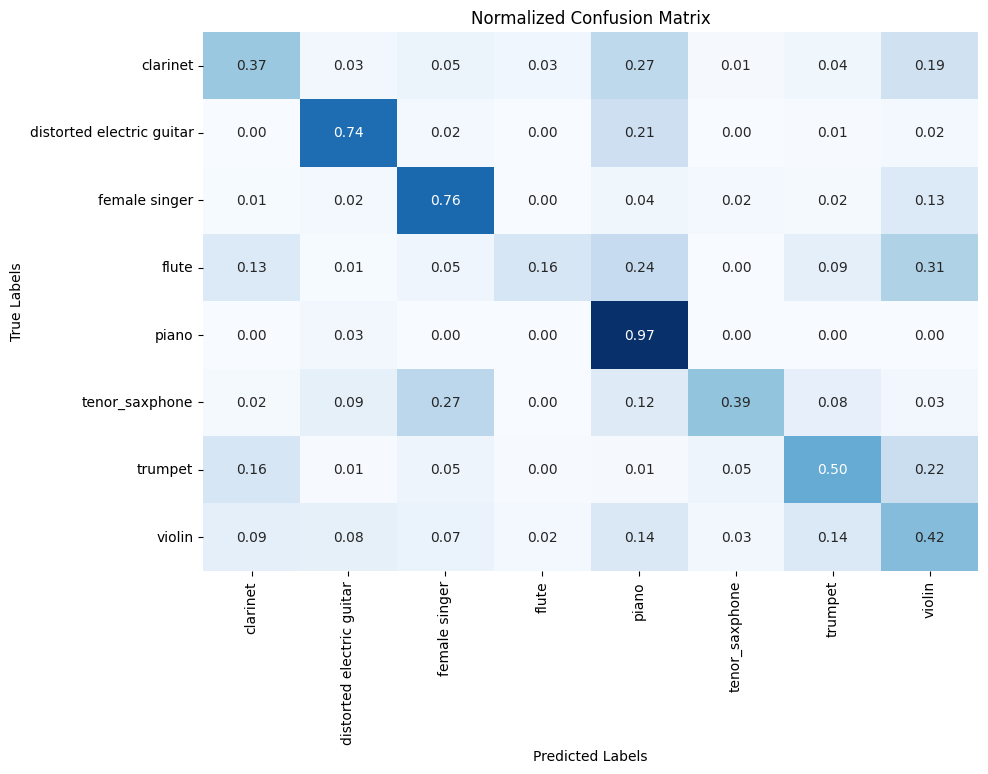

In [34]:
# for printing a normalized matrix
matrix_norm = confusion_matrix(Y_latent_test, y_latent_pred, normalize='true' )

plt.figure(figsize=(10, 7))
sns.heatmap(matrix_norm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

`# YOUR RESPONSE HERE`

### Part 5-C: Perform Error Analysis


1. Which instrument class has the best & worst performance?
2. For the worst source, what other sources are commonly confused? Why?
3. Listen to the audio for examples the classifier got wrong. What do they have in common?

Hint: to listen to the audio you can use `ipd.Audio` from `IPython.display`.

In [26]:
from IPython.display import Audio
dataset = u.load_data(data_home)
#from csv search for the id
# Clarinet audio
audio1, sr = dataset.track('08236ca1-9671-5ad2-fc8c-625ae36d06ea').audio[0], dataset.track('08236ca1-9671-5ad2-fc8c-625ae36d06ea').audio[1]
display(Audio(audio1, rate=sr))

# Flute audio
audio2 = dataset.track('e6b33451-d8f8-52cc-f4f1-cb2c4a83ecc2').audio[0]
display(Audio(audio2, rate=sr))

# Violin audio
audio3 = dataset.track('432f68f4-1160-59d9-feaa-8fc9060b78d9').audio[0]
display(Audio(audio3, rate=sr))

# Saxophone audio
audio4 = dataset.track('8712f962-3832-5edc-fd6c-8aeca10f137a').audio[0]
display(Audio(audio4, rate=sr))

In [31]:
#other instrument audio, but different than the above 4

# Piano audio
audio5 = dataset.track('1fd01d25-94ed-5a07-f442-7c7a66f9dfd4').audio[0]
display(Audio(audio5, rate=sr))

# Guitar audio
audio6 = dataset.track('5685972f-2046-53aa-fe42-27a71ed5c466').audio[0]
display(Audio(audio6, rate=sr))

# Singer audio
audio7 = dataset.track('3cb6e81a-6e5e-5efc-f574-cff39f98bd3c').audio[0]
display(Audio(audio7, rate=sr))

#trumpet
audio8 = dataset.track('192e4255-d42d-5139-f487-c3ccc3a95bb6').audio[0]
display(Audio(audio8, rate=sr))


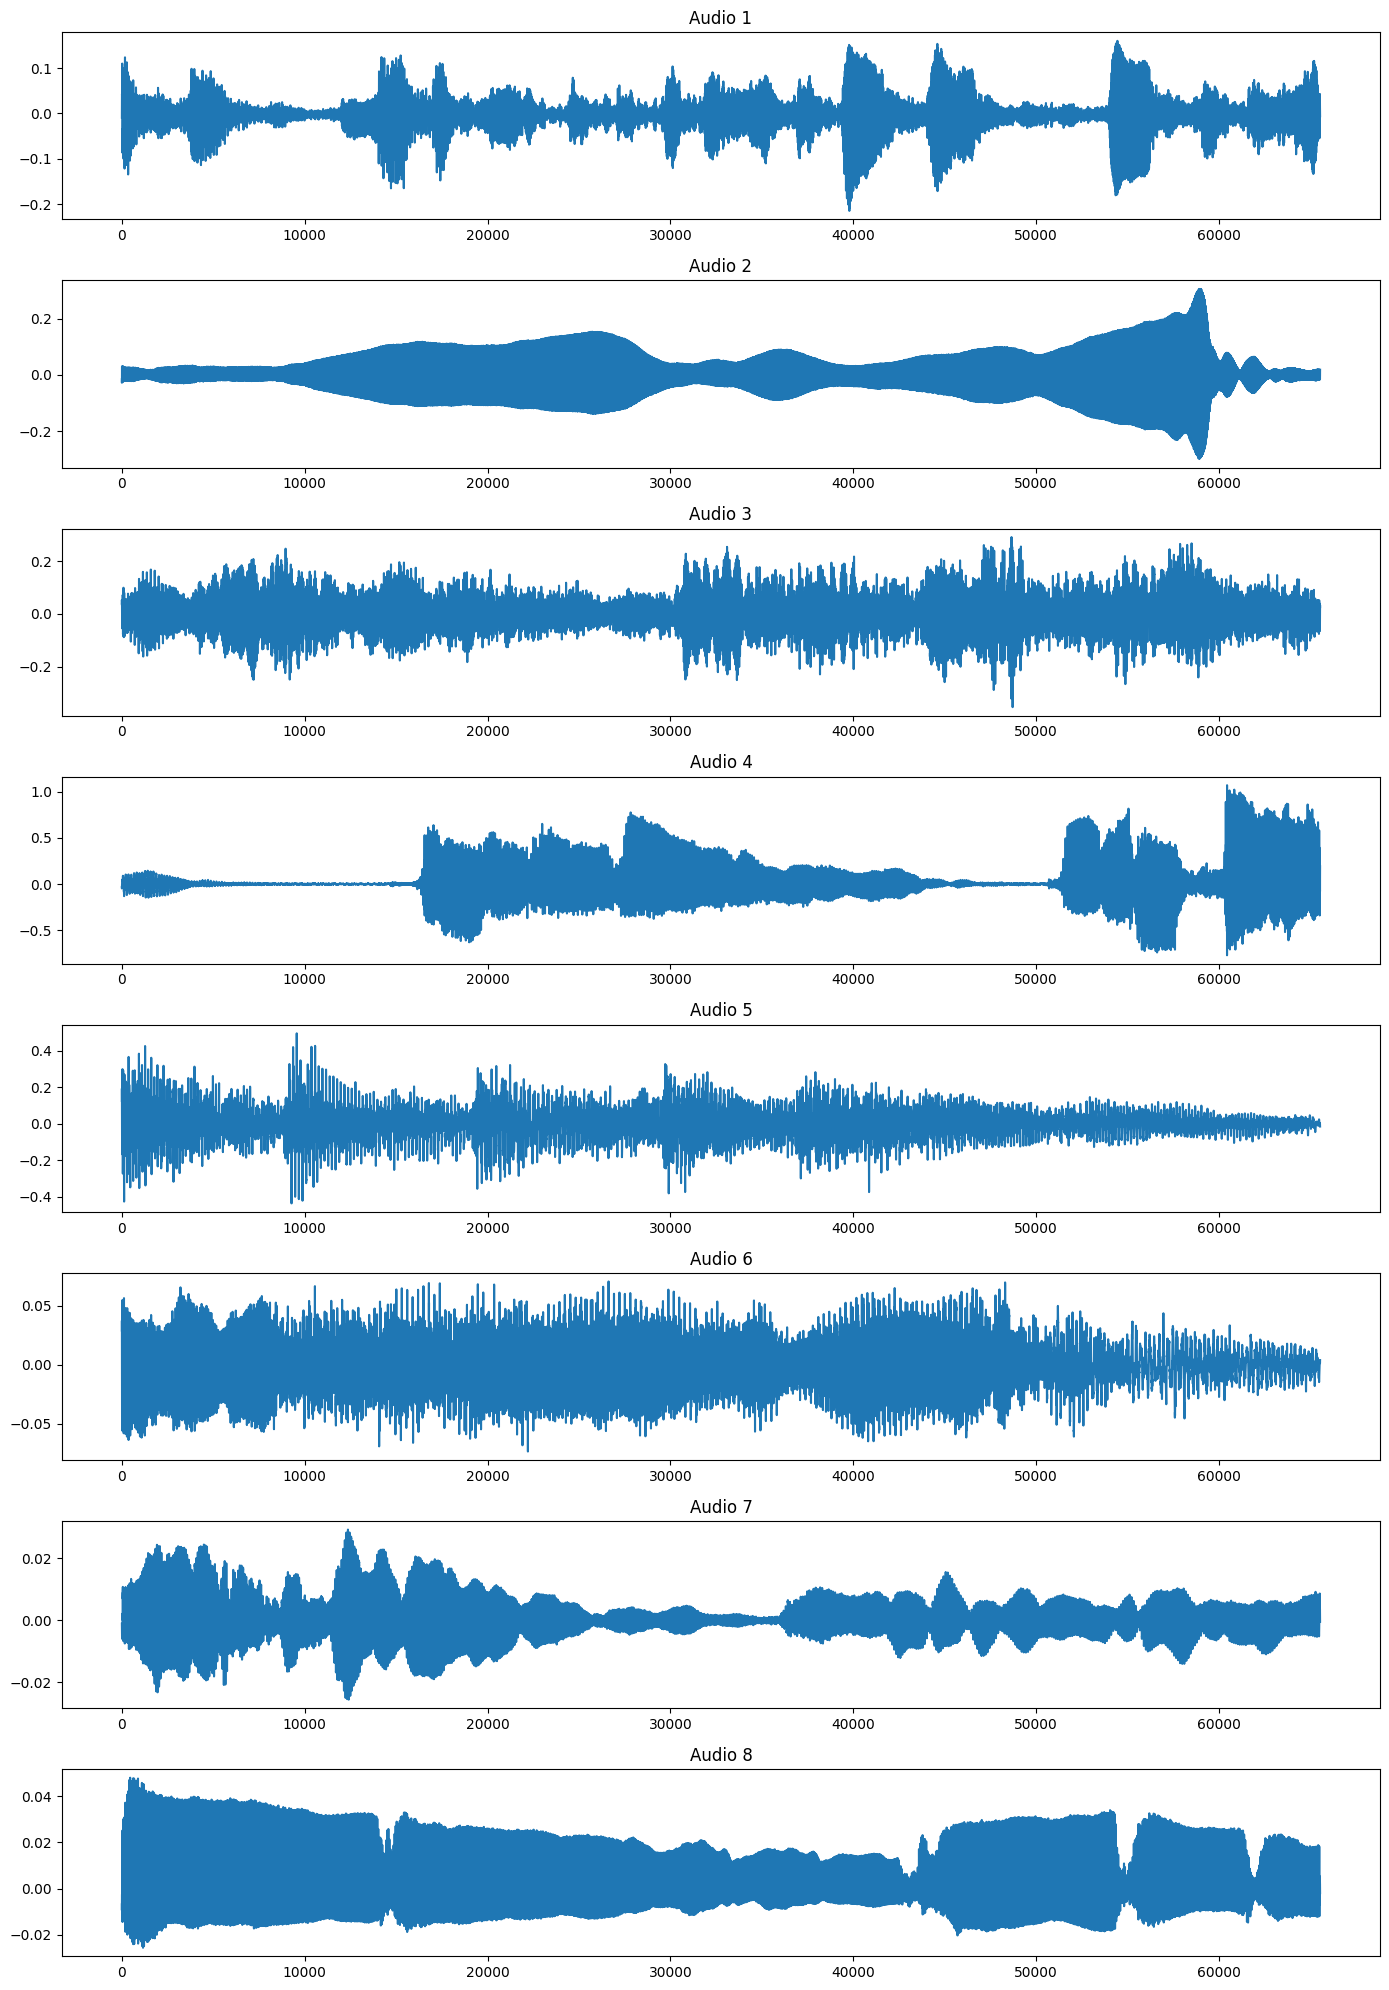

In [32]:
import matplotlib.pyplot as plt

# Assuming audio1, audio2, ..., audio7 are numpy arrays representing the audio signals

plt.figure(figsize=(14, 20))

# Plot each audio signal
for i, audio in enumerate([audio1, audio2, audio3, audio4, audio5, audio6, audio7, audio8], 1):
    plt.subplot(8, 1, i)
    plt.plot(audio)
    plt.title(f'Audio {i}')
    plt.tight_layout()

plt.show()

`# YOUR RESPONSE HERE`

1. piano class has the best performance, the predicted label have 97% correctness in predicting the audio come from the piano
   flute, tenor saxphone, and violin class have the worst performance, where almost no audio have been identified as these 3 instrument
   guitar, singer have a relative good rate at around 80%
   trumpet has a good rate around 60%, however, around 37% test cases they are identified as the clarinet

2. for the worst instrument class is the clarinet class, it does a good job in identifying clarinet audio, but also confused with other sources including flute, violin, saxphone, trumpet

3. piano, guitar, singer, each have their distinctive ADSR envelope and a distinctive timbre, for example, piano sound are very percussive which means a sharp attack and a fast decay
   clarinet, flute, saxphone, trumpet, can be much more similar, they are wind instrument which have slow attack, violin also have a slow attack and that could cause confusion



